# Three State Economy #

Price processes of the riskless bond and risky stock:

$B_0 = 10$ and $B_1 = \begin{bmatrix} 11 \\ 11 \\ 11 \end{bmatrix}$ \
\
$S_0 = 10$ and $S_1 = \begin{bmatrix} 20 \\ 10 \\ 5 \end{bmatrix}$

and the payoff matrix $M$ : \
\
$M = \begin{bmatrix} 11 & 20 \\ 11 & 10 \\ 11 & 5 \end{bmatrix}$

In [432]:
import numpy as np
rng = np.random.default_rng(100)  # fix seed for replication purposes

# price processes of the bond and stock at t=0 and t=1:
B = (10, np.array((11, 11, 11)))
S = (10, np.array((20, 10, 5)))

n = 1000  # number of portfolios to be simulated
b = rng.random(n)  # generate n random numbers between 0 and 1 for weights of the bond
b[:5]  # sample of first 5 numbers in array b

array([0.83498163, 0.59655403, 0.28886324, 0.04295157, 0.9736544 ])

In [433]:
s = rng.random(n)  # generate n random numbers between 0 and 1 for weights of the stock
A = np.array([b[i]*B[1] + s[i]*S[1] for i in range(n)])  # generate n number of portfolio payoff vectors at t=1, with appropriate weights.
A[:5]

array([[19.86232075, 14.52355934, 11.85417864],
       [26.35796184, 16.46002807, 11.51106118],
       [11.64939184,  7.41344375,  5.2954697 ],
       [ 6.02897018,  3.25071873,  1.861593  ],
       [22.04023453, 16.37521644, 13.54270739]])

In [434]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")

Text(0.5, 0, 'Payoff in state *down*')

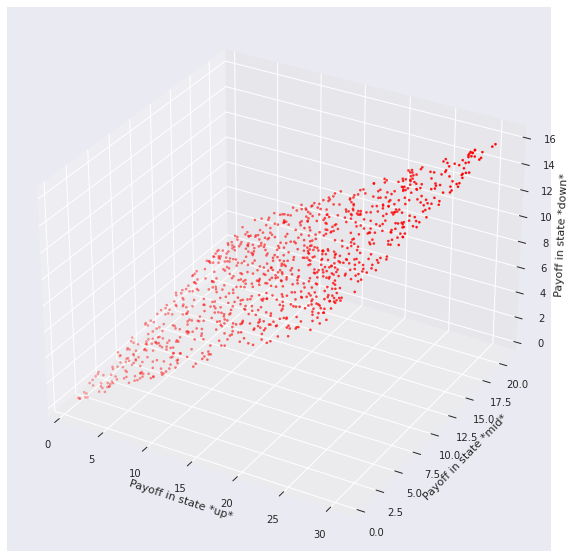

In [435]:
fig = plt.figure(figsize=(14, 10))  # an empty canvas is created
ax = fig.add_subplot(111, projection="3d")  # A subplot for a 3d object is added.
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c="r", marker=".")  # The payoff vector is visualized as a dot in 3d.
ax.set_xlabel("Payoff in state *up*")
ax.set_ylabel("Payoff in state *mid*")
ax.set_zlabel("Payoff in state *down*")

## Martingale Measure of the Stock Price Process in an Incomplete Market ##

There are infinitely many martingale probability measures in an incomplete market. Because:

$S_0 (1+i) = E^Q(S_1)$ \
\
and \
\
$Q = \begin{bmatrix} q^u \\ q^m \\ q^d \end{bmatrix}$ where $Q$ is the martingale probability measure. It follows: \
\
$S_0 (1+i) = \begin{bmatrix} q^u \\ q^m \\ q^d \end{bmatrix} * \begin{bmatrix} S_1^u \\ S_1^m \\ S_1^d \end{bmatrix} = q^u S_1^u + q^m S_1^m + q^d S_1^d $ \
\
in this equation we can for example fix $q^u = q$ and then we have infinitely possible values for $q^m$ and $q^d$ that satisfy the equation. \
Therefore in this market model, the martingale probability measure $Q$ is **not** unique and therefore the market model is **incomplete**.

In [436]:
# Let's use one of the values of Q that satisfy the Martingale discounting equation above.
Q = np.array((0.3, 0.3, 0.4))
discounted_S1 = np.dot(Q, S[1])
discounted_S1  # martingale price is equal to arbitrage price, as expected.

11.0

### **VERY IMPORTANT!!!!!** ###

It should be clear that this has significant consequences for the pricing of contingent claims (options contracts) since different \
martingale measures will lead to **different** $C_0$ values of contingent claims **that are all consistent with the abscence of arbitrage.**

For example, if we look at the first Arrow-Debreu security that has a payoff vector of $\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$ which is not possible to be replicated by any portfolio in the economy.\
\
its price at $t=0$ should be $\gamma_0 = \large\frac{1}{1+i} E^Q[\gamma_1] = \frac{1}{1+i}q^u$ where $Q = \begin{bmatrix} q^u \\ q^m \\ q^d \end{bmatrix}$ is the martingale probability measure.

In the model economy, $0.1 \le q^u \le 0.4$ must hold for $q^u$ to be a valid probability measure, so consistent with this inequality, \
the martingale price for the first Arrow-Debreu security avoiding all arbitrage opportunities lies in the interval $\frac{1}{1+i} 0.1 \le \gamma_0^u \le \frac{1}{1+i} 0.4$ \
\
which is equivalent to \
\
$\frac{1}{11} \le \gamma_0^u \le \frac{4}{11}$

## Super-Replication ##

Super replication is when a future payoff vector of portfolio $\phi$ is element-wise greater than or equal to the payoff vector of the contingent claim $C_1$ (not necessarily equal.)

Consider again the first Arrow-Debreu security which cannot be replicated by any portfolio $\phi = \begin{bmatrix} b \\ s \end{bmatrix}$ where $b \in \mathbb{R}$ and $s \in \mathbb{R}$ are weights of the bond and the stock, respectively. \
\
we can replicate the payoff $C_1 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$ by choosing $\phi^* = \begin{bmatrix} \large\frac{1}{B_1} \\ 0\end{bmatrix}$ so that the payoff vector of the replication portfolio is: \
\
$M \cdot \phi^* = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$ which satisfies the element-wise greater than or equal to condition of super-replication.


After understanding this, we also want the portfolio construction cost to super-replicate this contingent claim to be as close to the price of the contingent claim at $t=0$ as possible. \
So we have a minimization problem on $t=0$ cost of the replication portfolio:

$\underset{\phi}{min} \: V_0(\phi)$ \
such that $V_1(\phi) \ge C_1$ or equivelantly: \
\
$\underset{b, s}{min} \; b \cdot B_0 + s \cdot S_0$ \
 such that $V_1(\phi) \ge C_1$

In [437]:
B = (10, np.array((11, 11, 11)))  # price process of the bond
S = (10, np.array((20, 10, 5)))  # price process of the stock

C1 = np.array((1, 0, 0))  # payoff of the first Arrow-Debreu security at t=1

def V(phi, t):
    """Calculates the payoff of the portfolio at t=0 or t=1

    Args:
        phi (2d numpy array): weights of the bond and stock
        t (int): time value where t=0 means today and t=1 means the future

    Returns:
        V (ndarray): price of the portfolio at t=0 or t=1
    """
    V = phi[0] * B[t] + phi[1] * S[t]
    return V

In [438]:
phi = np.array((0.5, 0.5))
t0_value = V(phi, 0)
t1_value = V(phi, 1)

print("Cost to construct the portfolio at t=0 :", t0_value)
print("Portfolio payoff vector at t=1 :", t1_value)

Cost to construct the portfolio at t=0 : 10.0
Portfolio payoff vector at t=1 : [15.5 10.5  8. ]


Now to use _SciPy_ to solve the constrained minimization problem. Remember we want two things:

1) $V_1(\phi) \ge C_1$ constraint must hold.
2) Under the above constraint, portfolio value at $t=0: V_0(\phi)$ must be minimized.

In [439]:
from scipy.optimize import minimize

B = (10, np.array((11, 11, 11)))  # price process of the bond
S = (10, np.array((20, 10, 5)))  # price process of the stock

# constraints where | V(phi, 1) - C1 >= 0 | must hold.
cons = {"type": "ineq", "fun": lambda phi: V(phi, 1) - C1}  # Remember the lambda notation.

# Start the minimization algorithm.
res = minimize(lambda phi: V(phi, 0), (0.01, 0.01), method="SLSQP", constraints=cons)  # Minimize the V(phi, 0) scalar function. Note that we used the lambda notation again.
phi_sr = res["x"]  # the results dictionary "res" can be accessed with by using keys.
print(res)
print("super-replicated phi =", phi_sr)  # Short -0.03 the bond, buy 0.067 the stock

     fun: 0.36363636363557533
     jac: array([10., 10.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-0.03030303,  0.06666667])
super-replicated phi = [-0.03030303  0.06666667]


In [440]:
# The cost of the super-replication portfolio at t=1
print(V(phi_sr, 0))

0.36363636363557533


In [441]:
# The payoff vector of the super-replication portfolio at t=1
print(V(phi_sr, 1).round(4))  # nearly the same payoff with the first Arrow-Debreu security (1, 0, 0). Perfectly replicates the up and down state, super-replicates mid state.

[ 1.      0.3333 -0.    ]


## Approximate Replication ##

This time we assume we don't need our portfolio payoff vector to be necessarily always greater than the payoff of the contingent claim element-wise, as it can be too costly. \
We just minimize the mean squared error between the portfolio payoff vector $V_1(\phi)$ and the contingent claim payoff vector $C_1$ to have an approximate value for $\phi$: \
\
$\underset{\phi}{min} \; MSE(M \cdot \phi - C_1)$

In [442]:
C1 = np.array((1, 0, 0))  # payoff of the first Arrow-Debreu security at t=1
M = np.array((B[1], S[1])).T  # create the payoff matrix consisting of the payoff vectors of the bond and the stock.
M

array([[11, 20],
       [11, 10],
       [11,  5]])

solve for $\phi$ such that mean squared error of the vector $M \: \phi - C_1$ is minimized element-wise.

In [443]:
reg = np.linalg.lstsq(M, C1, rcond = -1)
reg

(array([-0.04545455,  0.07142857]),
 array([0.07142857]),
 2,
 array([28.93835724,  7.11136277]))

In [444]:
print(reg[0])  # The optimal portfolio positions: phi
print(reg[1])  # The mean squared error obtained from the optimization procedure
print(reg[2])  # Rank of matrix M
print(reg[0])  # singular values of matrix M

[-0.04545455  0.07142857]
[0.07142857]
2
[-0.04545455  0.07142857]


In [445]:
# Value or cost to construct of the portfolio at t=0, which is lower than the super-replication value 0.36
V(reg[0], 0)

0.25974025974025977

In [446]:
# The payoff vector of the portfolio at t=1
V(reg[0], 1)

array([ 0.92857143,  0.21428571, -0.14285714])

In [447]:
# The vector of replication errors between approximate portfolio payoff and contingent claim payoff.
error_array = V(reg[0], 1) - C1
error_array

array([-0.07142857,  0.21428571, -0.14285714])

In [448]:
# Mean squared value of replication errors.
np.mean(error_array**2)

0.023809523809523808

## Capital Market Line ##

In [449]:
mu_S = (S[1]/S[0] - 1).mean()  # Expected rate of return of the stock at t=1 (assuming equal probability)
mu_S

0.16666666666666666

In [450]:
sigma_S = ((S[1]/S[0] - 1) - mu_S).std()  # Volatility of the rate of returns of the stock at t=1 (assuming equal probability)
sigma_S

0.6236095644623235

If we construct a portfolio with no short-selling allowed, with weights of the _bond_ and the _stock_ adding up to 1, then:
1) Expected rate of return of the portfolio ranges from $i$ (interest rate) and $\mu_S$ (0.167)

2) Portfolio volatility ranges from $\sigma_B = 0$ to $\sigma_S = 0.624$

However, if short-selling is allowed, risk-return combinations two lines are created and \
the upper line (consisting of portfolios shorting the bond) is called the **Capital Market Line (CML)**. 

In [451]:
s = np.linspace(-2, 2, 25)  # weights of the stock from -200% to 200%
b = (1 - s)  # weights of the bond, notice both weights add up to 1
i = 0.1  # interest rate

mu = b*i + s*mu_S  # Expected rates of return of the portfolio
mu

array([-0.03333333, -0.02222222, -0.01111111,  0.        ,  0.01111111,
        0.02222222,  0.03333333,  0.04444444,  0.05555556,  0.06666667,
        0.07777778,  0.08888889,  0.1       ,  0.11111111,  0.12222222,
        0.13333333,  0.14444444,  0.15555556,  0.16666667,  0.17777778,
        0.18888889,  0.2       ,  0.21111111,  0.22222222,  0.23333333])

In [452]:
sigma = abs(s) * sigma_S  # Volatilies of the rates of return of the portfolio
sigma

array([1.24721913, 1.1432842 , 1.03934927, 0.93541435, 0.83147942,
       0.72754449, 0.62360956, 0.51967464, 0.41573971, 0.31180478,
       0.20786985, 0.10393493, 0.        , 0.10393493, 0.20786985,
       0.31180478, 0.41573971, 0.51967464, 0.62360956, 0.72754449,
       0.83147942, 0.93541435, 1.03934927, 1.1432842 , 1.24721913])

Text(0.5, 1.0, 'Expected rate of return vs Risk')

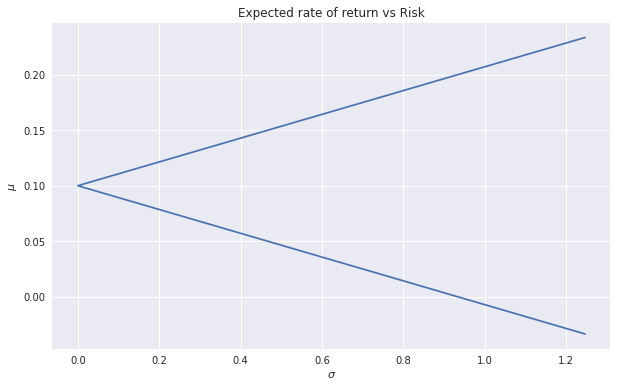

In [453]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sigma, mu)
ax.set_xlabel("$\sigma$")
ax.set_ylabel("$\mu$")
ax.set_title("Expected rate of return vs Risk")

The upper line in the graph is called **Capital Market Line (CML)**. The equation describing the **CML** is:

$\mu = i + \Large\frac{\mu_S - i}{\sigma_S} \cdot \small\sigma$ \
\
where \
\
$\mu:$ Expected rate of return of the constructed portfolio \
$\sigma:$ Volatility of the constructed portfolio \
$\mu_S:$ Expected rate of return of the stock (market portfolio) \
$\sigma_S:$ Volatility of the stock (market portfolio)

## Capital Asset Pricing Model (CAPM) ##

**CAPM** relates the expected rate of return and volatility of a **risky asset** $T$ to the expected rate of return and volatility of a **market portfolio** $S$. \
\
According to **CAPM**, $\mu_T$ and $\sigma_T$ of an arbitrary asset or portfolio depends only on the asset's correlation to market portfolio $\rho_{ST}$

Consider the financial asset $T$, which has a non-zero correlation to the market portfolio $S$. \
The expected rate of return of the asset $T$ is: \
\
$\mu_T = i + \Large\frac{(\mu_S - i) \cdot \rho_{ST}}{\sigma_S} \cdot \normalsize \sigma_T$

Notice that according to the above equation, the expected rate of return of the bond $B$ is equal to the riskless interest rate $i$.

The *covariance* between $T$ and $S$ is defined as $\sigma_{ST} = \rho_{ST} \cdot \sigma_S \cdot \sigma_T$ \
\
then, \
\
$\large\mu_T = i + \Large\frac{(\mu_S - i) \cdot \sigma_{ST}}{\sigma_S ^2} \large = i + \beta_T \cdot (\mu_S - i) $ \
\
where, \
\
$\beta_T \equiv \Large\frac{\sigma_{ST}}{\sigma_S ^2} $ and $\sigma_{ST}$ is the **covariance** between $S$ and $T$ \
\
$(\mu_S - i) :$ Excess return of the market portfolio.

For the CAPM, the **CML** is replaced by the **Security Market Line (SML)**, which is plotted in $\beta$ return space as follows:

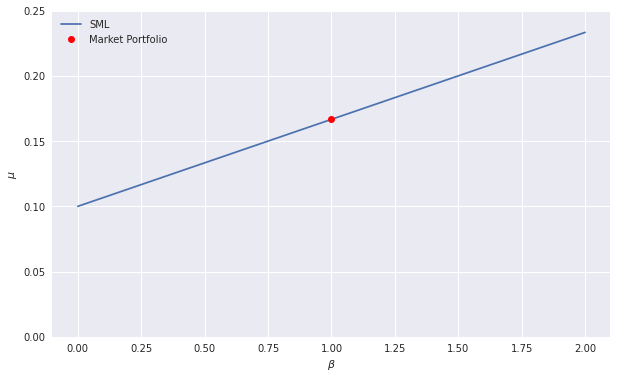

In [454]:
beta = np.linspace(0, 2, 25)  # Create 25 beta parameter values ranging from 0 to 2
mu = i + beta * (mu_S - i)  # Calculate expected rate of return of the portfolios: mu

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(beta, mu, label="SML")
ax.set_xlabel("$\\beta$")
ax.set_ylabel("$\mu$")
ax.set_ylim(0, 0.25)
ax.plot(1, mu_S, "ro", label="Market Portfolio")
ax.legend()